\newpage

# Question

### 1)

Our target variable measure the severity of heart disease which can be defined as binary classification problem. Our goal would then to be able to predict the probability of heart disease. This means we can carry out a logistic regression and a random forest classifier to predict the presence and absence of heart disease.  

### 2)

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
  
heart_disease = fetch_ucirepo(id=45) 
 
X = heart_disease.data.features 
y = heart_disease.data.targets 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)


### 3)

We have 13 features and 1 target variable. Starting with our features, we have age (age in years), sex (1 = male; 0 = female), cp (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic), trestbps (resting blood pressure in mm Hg on admission to the hospital), chol (serum cholestoral in mg/dl), fbs (fasting blood sugar > 120 mg/dl where 1 = true; 0 = false), restecg (resting electrocardiographic results), exang (exercise induced angina), oldpeak (ST depression induced by exercise relative to rest), slope (1 = upsloping, 2 = flat, 3 = downsloping), ca (number of major vessels colored by floursopy), thal (3 = normal; 6 = fixed defect; 7 = reversable defect). Finally our target variable, 'num', is the diagnosis of heart disease.

In [3]:
print(f"Observations in X: {len(X)}")
print(f"Summary of X:\n{X.describe()}")
print(f"Summary of y:\n{y.describe()}")

Observations in X: 303
Summary of X:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.

We find that the average age of patients is 54.4 years old, with a standard deviation of 9.1 years.

In [4]:
print(f"Data Types of X: \n{X.dtypes}")
print(f"\nData Types of y: \n{y.dtypes}")

Data Types of X: 
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Data Types of y: 
num    int64
dtype: object


All of our data types in X are numerical but some representing categorical variables.

### 4)

In [5]:
print(f"y before transformation: {y['num'].value_counts()}")
y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)
print(f"y before transformation: {y['num'].value_counts()}")

y before transformation: num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
y before transformation: num
0    164
1    139
Name: count, dtype: int64


/var/folders/5q/w2pw9gp90mldwv2xvm9ml_jc0000gn/T/ipykernel_61415/2854447611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)


### 5)

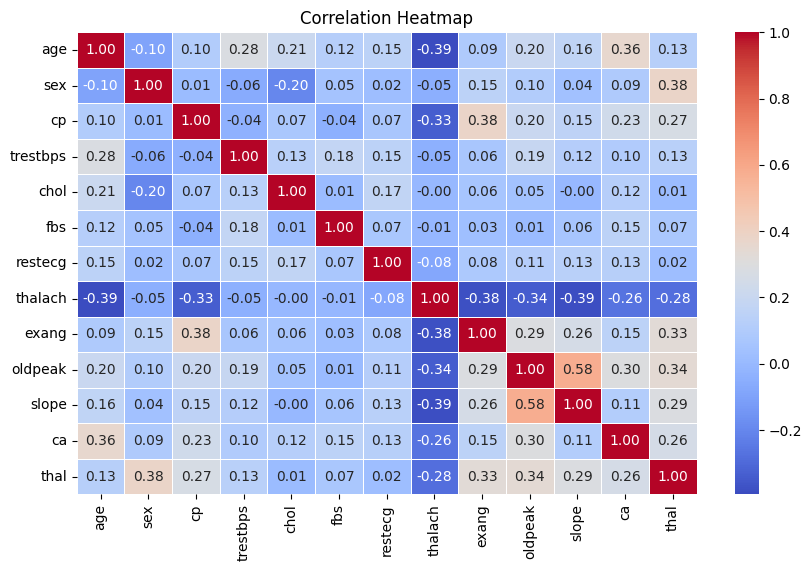

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From this correlation matrix, we can conclude that thalach (max heart rate) has a strong negative correlation (-0.39) with age and oldpeak. We can assume that younger individuals tend to have a higher heart rate, while those with more severe heart disease (higher oldpeak) have lower thalach. We also found that ca (number of major vessels) has a strong positive correlation (0.36) with age. We can say that older individuals are more likely to have more blocked vessels. 

### 6)

In [7]:
X = X.dropna()
y = y.loc[X.index]

print(f"Length of X after transformations: {len(X)}")
print(f"Length of y after transformations: {len(y)}")

Length of X after transformations: 297
Length of y after transformations: 297


### 7)

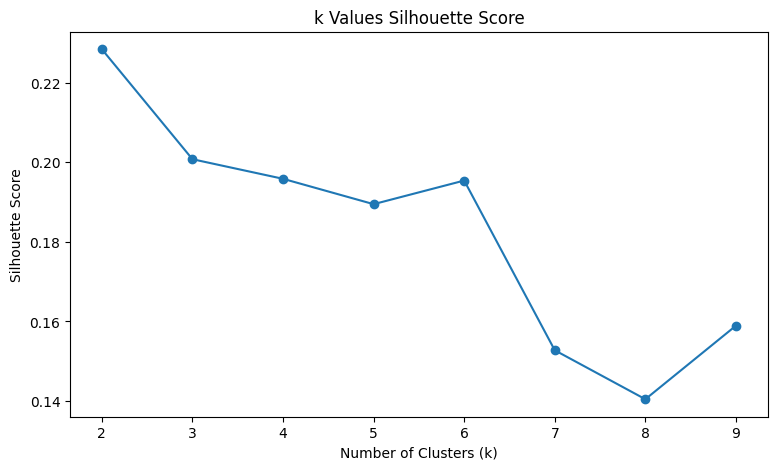

In [20]:
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
X_cleaned = X.drop(columns=categorical_columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

k_range = range(2,10)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 20, random_state = 0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(9, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.title("k Values Silhouette Score")
plt.show()


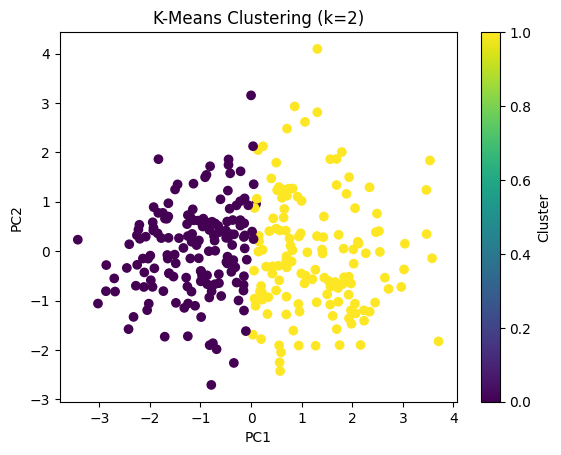

In [21]:
# use k = 2 based on the silhouette scores

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering (k=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

X_scaled_df = pd.DataFrame(X_scaled, columns=X_cleaned.columns)
X_scaled_df['cluster'] = clusters

### 8)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### 9) 

We are going to use logistic regression and random forest. Logistic regression is suitable for this assignment because it predicts a binary outcome, in which case, the target variable is 0 or 1. Random forest is also a good classifier to use because it has high predictive accuracy and does not depend on linear relationships, which is good for this dataset as there are both numerical and categorical variables.

### 10)

We are going to use accuracy and F1 scores to compare the classifier performance between logistic regression and random forest. We can create the confusion matrix from the predictions to calculate the accuracy and F1 scores. Accuracy scores are calculated by the number of correct predictions over the total number of predictions. 

\begin{align*}
\text{Accuracy} &= \frac{TP + TN}{TP + TN + FP + FN} \\
\text{Where:} \\
TP &= \text{True Positives} \\
TN &= \text{True Negatives} \\
FP &= \text{False Positives} \\
FN &= \text{False Negatives}
\end{align*}



To obtain the F1 score, we will need to use precision and recall that are derived from the confusion matrix. Once we calculate that, the F1 score can be calculated by:

\begin{align*}
\text{Precision} &= \frac{TP}{TP + FP} \\
\text{Recall} &= \frac{TP}{TP + FN} \\
F_1 &= \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\end{align*}

Using these metrics, we can compare the overall accuracy and balance between the two classifiers to determine which classifier most optimal for predicting heart disease.

### 11)

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20)
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

# Display the results
print(f"Test set accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found:  {'C': 0.08858667904100823, 'penalty': 'l2'}
Best cross-validation accuracy: 0.8458
Test set accuracy: 0.8444
Confusion Matrix:
[[43  8]
 [ 6 33]]
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.88      0.84      0.86        51
   Heart Disease       0.80      0.85      0.82        39

        accuracy                           0.84        90
       macro avg       0.84      0.84      0.84        90
    weighted avg       0.85      0.84      0.84        90



/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed w

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


rf_clf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_scaled, y_train)

print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Cross-Validation Accuracy:", rf_grid_search.best_score_)

best_rf_clf = rf_grid_search.best_estimator_
rf_y_pred = best_rf_clf.predict(X_test_scaled)

# Evaluate the Random Forest model's performance
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred, target_names=[f'Class {i}' for i in np.unique(y)])

# Display Random Forest results
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_cm)
print("Random Forest Classification Report:")
print(rf_report)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 

Random Forest Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best Cross-Validation Accuracy: 0.8358885017421602
Random Forest Test Accuracy: 0.8556
Random Forest Confusion Matrix:
[[43  8]
 [ 5 34]]
Random Forest Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.84      0.87        51
     Class 1       0.81      0.87      0.84        39

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90



/Users/jasmineho/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
